In [42]:
import tensorflow as tf
from keras.applications.resnet50 import ResNet50
#from tensorflow.keras.applications.resnet50 import ResNet50
from keras.models import Model
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.layers import Flatten, Input

In [39]:

from tensorflow.keras.models import Sequential

In [3]:
filename = 'C:/Users/rania/Downloads/cifar10-pngs-in-folders/cifar10/cifar10/test/bird/0068.png'

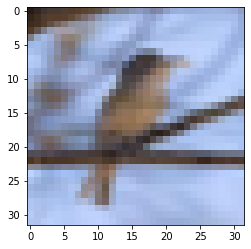

In [4]:
import matplotlib.pyplot as plt
import numpy as np
img = image.load_img(filename, target_size=(32, 32))
plt.imshow(img)
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = preprocess_input(img)


In [56]:
base_model = ResNet50(weights='imagenet', pooling=max, include_top = False)
input = Input(shape=(32,32,3),name = 'img')
x = base_model(input)
print(x.shape)
x = Flatten()(x)
print(x.shape)


model = Model(inputs=input, outputs=x)

(None, 1, 1, 2048)
(None, None)


In [69]:
#fetched properly of lastlayer(not the softmax)
features = model.predict(img)
features

array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [60]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_16 (InputLayer)           (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_16[0][0]                   
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, None, None, 6 256         conv1[0][0]                      
___________________________________________________________________________________________

In [72]:
#trying to fetch last but fourth layer(batch normalisation)
print(base_model.layers[-3].output)

Tensor("bn5c_branch2c_21/cond/Identity:0", shape=(None, None, None, 2048), dtype=float32)


In [73]:
base_model = ResNet50(weights='imagenet', pooling=max, include_top = False)
input = Input(shape=(32,32,3),name = 'img')
intermediate_layer_model = Model(inputs=input,outputs = base_model.layers[-3].output)

ValueError: Graph disconnected: cannot obtain value for tensor Tensor("input_23:0", shape=(None, None, None, 3), dtype=float32) at layer "input_23". The following previous layers were accessed without issue: []

In [74]:
#from keras.models import Model
#base_model = ResNet50(weights='imagenet', pooling=max, include_top = False)
#model = base_model  # include here your original model
#input = Input(shape=(32,32,3),name = 'img')
#print(input)
#layer_name = 'layer_!5'
#m = tf.keras.Sequential()
#m.add(base_model.layers[39].output)

#intermediate_layer_model = Model(inputs=input,
#                                 outputs=model.get_layer(layer_name).output)
#intermediate_output = intermediate_layer_model.predict(data)
#model.summary()

In [ ]:
#import tensorflow.compat.v1 as tf
#tf.disable_v2_behavior() 
#intlayer = base_model.layers[100].output
#intlayer_reshape = tf.reshape(intlayer,shape = (1,1,1024))
#print(intlayer_reshape.get_shape())
#X_shape = tf.TensorShape([None]).concatenate(intlayer_reshape.get_shape()[0:])
#X = tf.placeholder_with_default(intlayer, shape=X_shape)
#X